# Univariate Analysis

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [19]:
df = pd.read_csv('StockX-Data-Contest-2019-3.csv')
sp = [float(x[1:].replace(',', '')) for x in list(df['Sale Price'])]
df['Sale Price'] = sp
rp = [float(x[1:].replace(',', '')) for x in list(df['Retail Price'])]
df['Retail Price'] = rp

yzy = df[df['Brand'] == ' Yeezy']

In [20]:
yzy.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2/11/17,11.0,Rhode Island


In [21]:
yzy.dtypes

Order Date       object
Brand            object
Sneaker Name     object
Sale Price      float64
Retail Price    float64
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object

In [22]:
mean = yzy['Sale Price'].mean()
median = yzy['Sale Price'].median()
mode = yzy['Sale Price'].mode()

print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)

Mean: 360.03255175854326
Median: 316.0
Mode: 0    270.0
dtype: float64


<Figure size 1080x576 with 0 Axes>

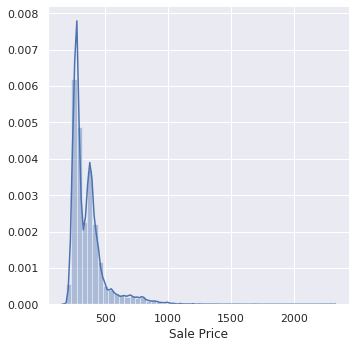

In [29]:
plt.figure(figsize=(15,8))
sns.FacetGrid(yzy,height=5).map(sns.distplot,"Sale Price").add_legend()


## Boxplot
Box goes from 1st quartile to 3rd

First vertical line is minimum, second (inside the box) is median, third is maximum

Points are outliers

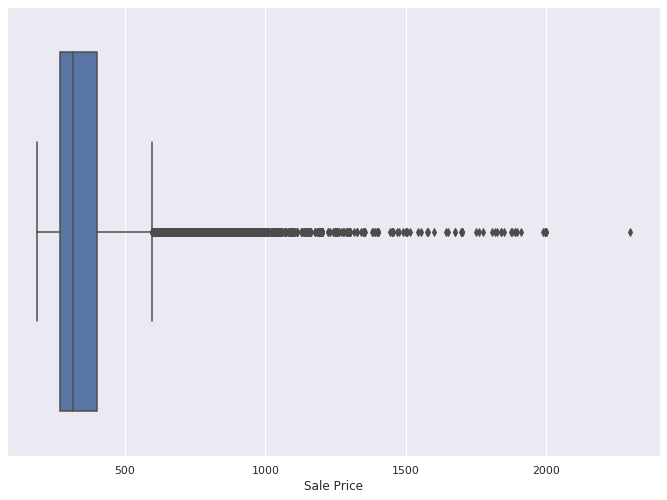

In [33]:
sns.boxplot(x='Sale Price', data=yzy)
plt.show()

# Bivariate Analysis

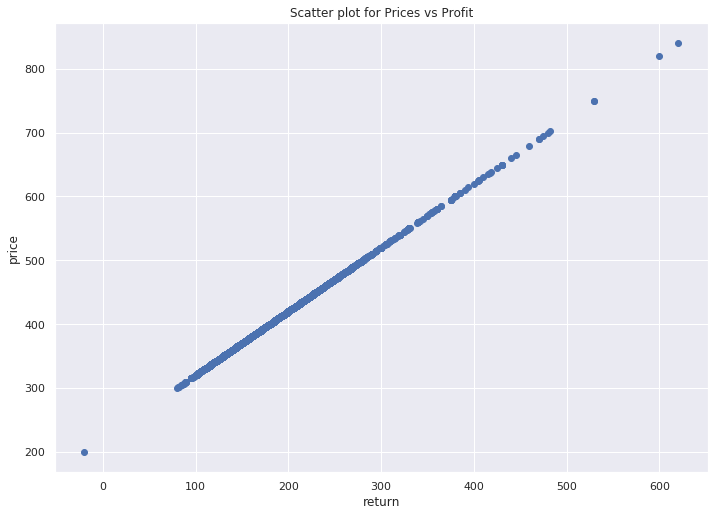

In [43]:

plt.scatter(yzy_b['Sale Price'] - yzy_b['Retail Price'], yzy_b['Sale Price'])
plt.title('Scatter plot for Prices vs Profit')
plt.xlabel('return')
plt.ylabel('price')
plt.show()

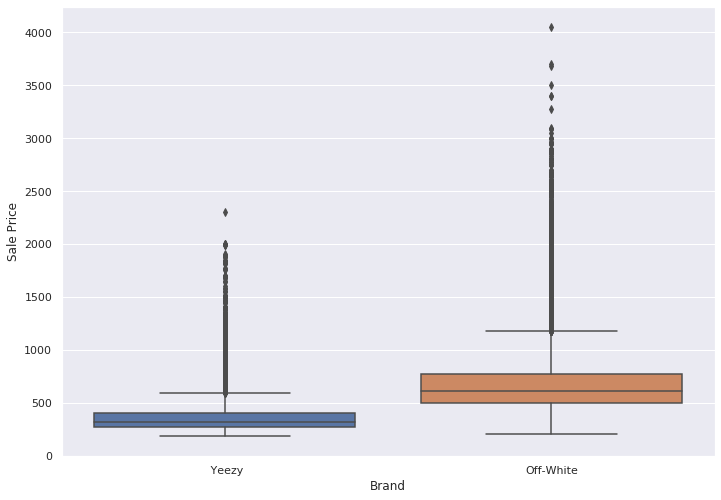

In [38]:
sns.boxplot(x='Brand', y='Sale Price', data=df)

# Multivariate Analysis

In [55]:
df = pd.read_csv('players_stats_by_season_full_details.csv')

In [56]:
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2009 - 2010,Regular_Season,Kevin Durant,OKC,82,3239.3,794,1668,128,...,2472,1988.0,Sep,"Sep 29, 1988",6-9,206.0,240.0,109.0,United States,Montrose Christian School
1,NBA,2009 - 2010,Regular_Season,LeBron James,CLE,76,2965.6,768,1528,129,...,2258,1984.0,Dec,"Dec 30, 1984",6-8,203.0,250.0,113.0,United States,St. Vincent St. Mary High School
2,NBA,2009 - 2010,Regular_Season,Dwyane Wade,MIA,77,2792.4,719,1511,73,...,2045,1982.0,Jan,"Jan 17, 1982",6-4,193.0,220.0,100.0,United States,Harold L. Richards High School
3,NBA,2009 - 2010,Regular_Season,Dirk Nowitzki,DAL,81,3038.8,720,1496,51,...,2027,1978.0,Jun,"Jun 19, 1978",7-0,213.0,245.0,111.0,Germany,NaN
4,NBA,2009 - 2010,Regular_Season,Kobe Bryant,LAL,73,2835.4,716,1569,99,...,1970,1978.0,Aug,"Aug 23, 1978",6-6,198.0,212.0,96.0,United States,Lower Merion High School


In [57]:
df.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school'],
      dtype='object')

Pair plot -> scatter showing the correlations and histogram to analyzes the distribution of an individual variable

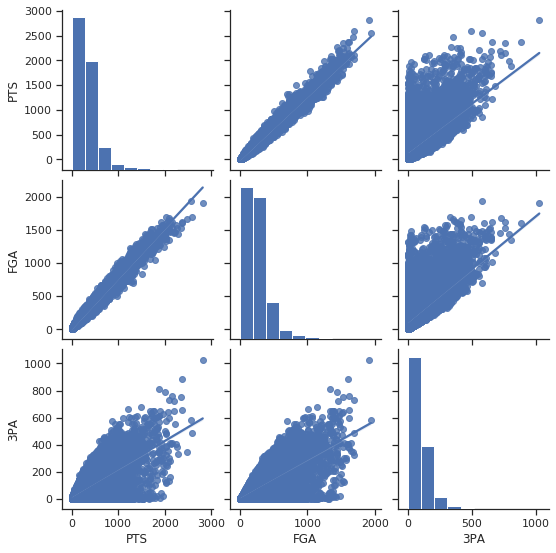

In [59]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(df, vars=['PTS', 'FGA', '3PA'], kind='reg')
plt.show()

In [61]:
from scipy import stats
corr = stats.pearsonr(df['PTS'], df['3PA'])

print('corr', corr[0])
print('p-value', corr[1])

corr 0.6286323281776351
p-value 0.0


In [72]:
cols = df.columns.values

df_useful = df[cols[0:22]]
corr = df_useful.corr(method='pearson')
corr

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
GP,1.000000,0.893928,0.742134,0.762239,0.505856,0.528300,0.593754,0.606087,0.689240,0.862387,0.535596,0.706708,0.682363,0.572226,0.672492,0.472413,0.737669
MIN,0.893928,1.000000,0.898011,0.919549,0.614252,0.638544,0.760915,0.765060,0.831695,0.838515,0.567866,0.803211,0.762423,0.710577,0.795640,0.494238,0.902028
FGM,0.742134,0.898011,1.000000,0.978444,0.544331,0.555214,0.856640,0.861637,0.825917,0.723667,0.620288,0.822430,0.793133,0.641488,0.719356,0.535006,0.989233
FGA,0.762239,0.919549,0.978444,1.000000,0.641024,0.667413,0.845776,0.837060,0.845298,0.721056,0.528102,0.777021,0.730742,0.693469,0.750743,0.460244,0.982939
3PM,0.505856,0.614252,0.544331,0.641024,1.000000,0.982150,0.435609,0.363288,0.482888,0.390007,-0.062546,0.282850,0.184210,0.544589,0.534735,-0.017817,0.618703
3PA,0.528300,0.638544,0.555214,0.667413,0.982150,1.000000,0.454609,0.386965,0.520095,0.412914,-0.052386,0.300280,0.200061,0.573091,0.572251,-0.013200,0.628632
FTM,0.593754,0.760915,0.856640,0.845776,0.435609,0.454609,1.000000,0.980646,0.798545,0.612483,0.511655,0.699852,0.669726,0.620649,0.643364,0.429493,0.900854
FTA,0.606087,0.765060,0.861637,0.837060,0.363288,0.386965,0.980646,1.000000,0.807033,0.645191,0.597026,0.747790,0.731756,0.589625,0.645472,0.495408,0.891460
TOV,0.689240,0.831695,0.825917,0.845298,0.482888,0.520095,0.798545,0.807033,1.000000,0.710079,0.465728,0.690495,0.648224,0.794744,0.760358,0.388393,0.840766
PF,0.862387,0.838515,0.723667,0.721056,0.390007,0.412914,0.612483,0.645191,0.710079,1.000000,0.626015,0.739432,0.735026,0.495715,0.656295,0.544313,0.713750


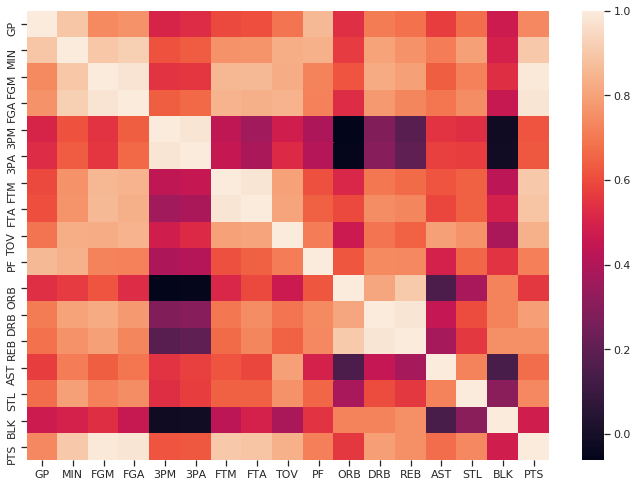

In [74]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()